# Brain Stroke Detection

### ToDo
- [x] Download Dataset
- [x] Exploratory Data Analysis
- [x] Data Preprocessing
- [x] Training Model
- [x] Evaluating

In [1]:
# Download Datase
from core import downloadDataset

DATA_URL = 'https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset'

downloadDataset(url = DATA_URL, datasetName = 'brain-stroke-dataset')

100%|██████████| 47.2k/47.2k [00:00<00:00, 1.44MB/s]

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv('./dataset/brain-stroke-dataset/brain_stroke.csv')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# Exploratory Data Analysis

df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


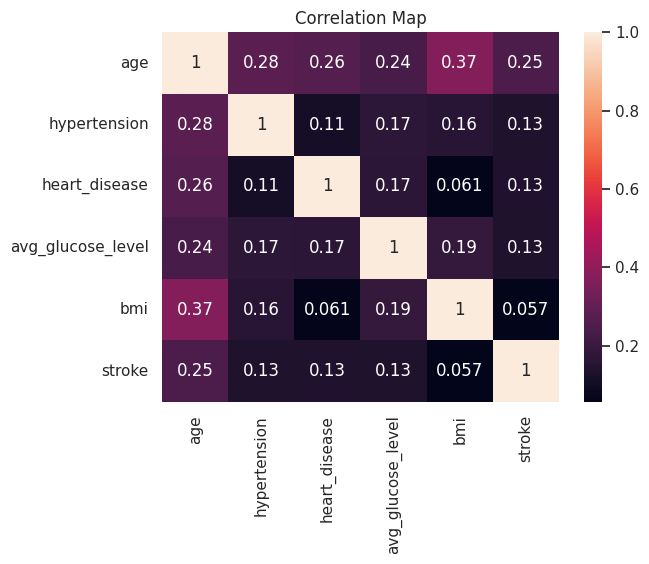

In [6]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Map')
plt.show()

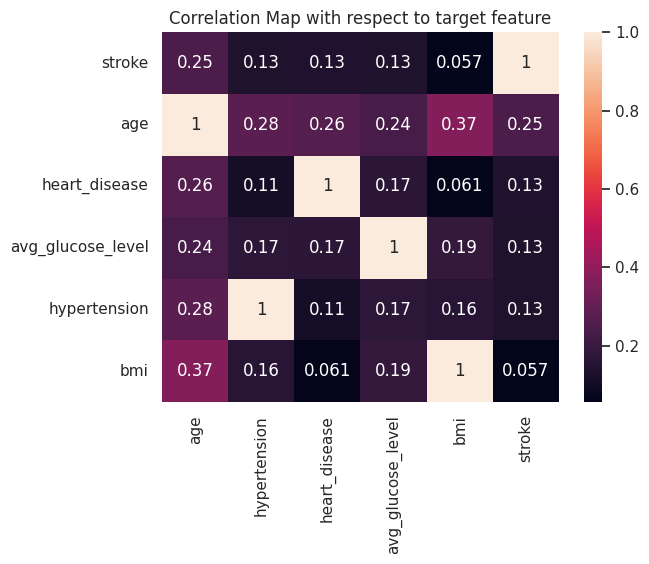

In [7]:
sns.heatmap(df.corr().sort_values(by = 'stroke', ascending = False), annot = True)
plt.title('Correlation Map with respect to target feature')
plt.show()

*Age correlate with target more than any other feature*

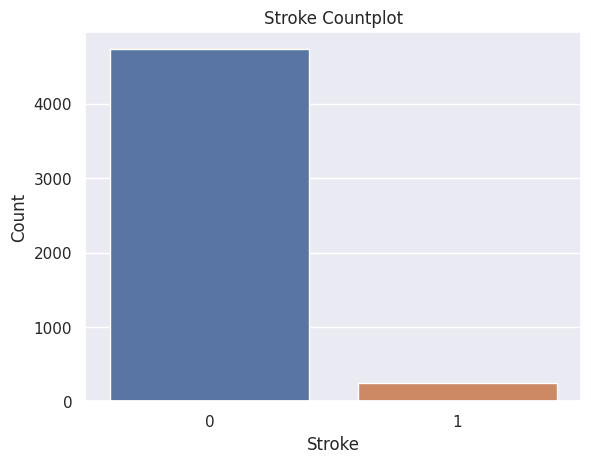

In [8]:
sns.countplot(data = df, x = df.stroke)
plt.title("Stroke Countplot")
plt.xlabel('Stroke')
plt.ylabel("Count")
plt.show()

*Patients without stroke is high*

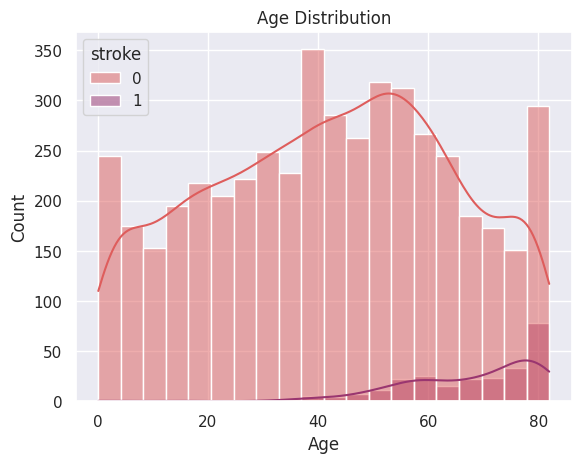

In [9]:
sns.histplot(data = df, x = 'age', hue = 'stroke', kde = True, palette = 'flare')
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

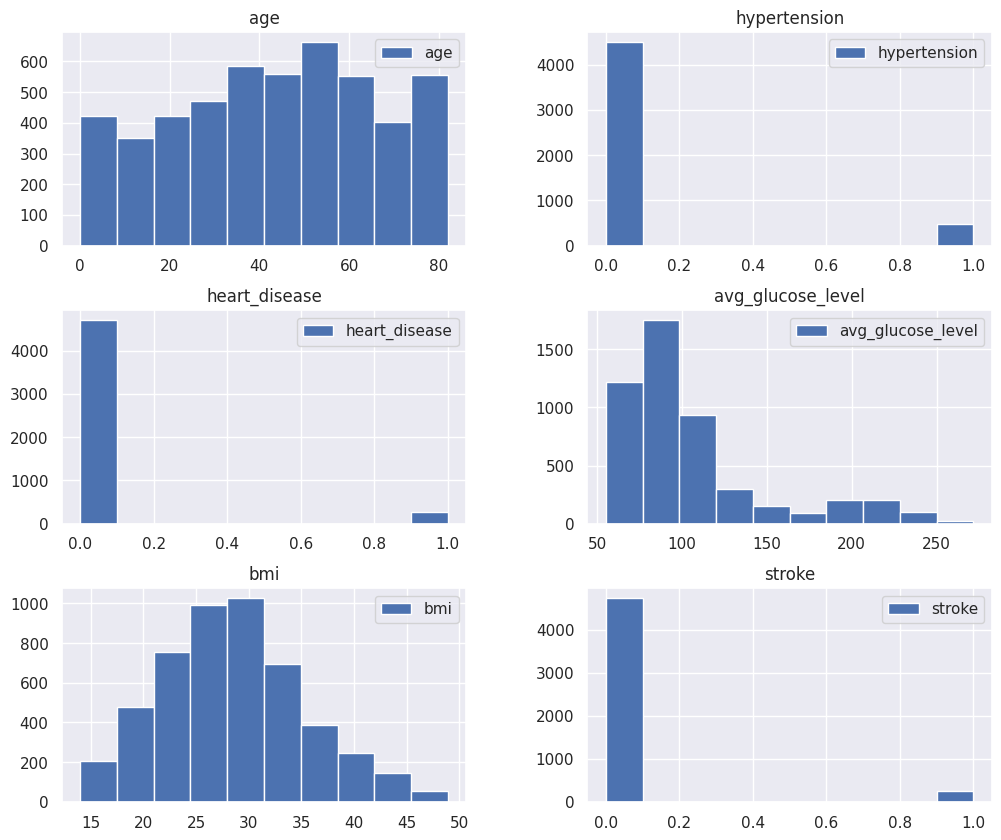

In [10]:
df.hist(legend = True, figsize = (12, 10));

In [11]:
# Data Preprocessing

df.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df['gender'] = df['gender'].map({"Male" : 1, "Female" : 0})
df['ever_married'] = df['ever_married'].map({"Yes" : 1, "No" : 0})
df['Residence_type'] = df['Residence_type'].map({"Urban" : 1, "Rural" : 0})

In [13]:
# Dropping unwanted columns

df.drop(columns=['work_type','smoking_status'], axis = 1, inplace = True)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,0,105.92,32.5,1
2,0,49.0,0,0,1,1,171.23,34.4,1
3,0,79.0,1,0,1,0,174.12,24.0,1
4,1,81.0,0,0,1,1,186.21,29.0,1


In [14]:
# Splitting Dataset

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 4)
train_df.shape, test_df.shape

((3984, 9), (997, 9))

In [15]:
inputCols = df.columns.tolist()[:-1]
target = 'stroke'

trainInputs = train_df[inputCols]
trainTarget = train_df[target]

testInputs = test_df[inputCols]
testTarget = test_df[target]

In [16]:
# Training Model

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [17]:
model = GridSearchCV(RandomForestClassifier(),{
    'n_estimators': [50,100,120],
    'criterion': ['gini','entropy']
}, cv = 5)

model.fit(trainInputs, trainTarget)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 120]})

In [18]:
model.best_estimator_, model.best_params_

(RandomForestClassifier(n_estimators=120),
 {'criterion': 'gini', 'n_estimators': 120})

In [19]:
bestScoreDf = pd.DataFrame(model.cv_results_)
bestScoreDf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.203769,0.014487,0.015726,0.001848,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.946048,0.946048,0.944793,0.951066,0.948492,0.947289,0.002237,6
1,0.358015,0.030172,0.030090,0.006611,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.947302,0.947302,0.944793,0.951066,0.949749,0.948043,0.002178,4
2,0.412101,0.015515,0.028782,0.004876,gini,120,"{'criterion': 'gini', 'n_estimators': 120}",0.948557,0.947302,0.947302,0.948557,0.949749,0.948294,0.000919,1
3,0.209080,0.025172,0.017369,0.006168,entropy,50,"{'criterion': 'entropy', 'n_estimators': 50}",0.947302,0.951066,0.943538,0.947302,0.951005,0.948043,0.002804,3
4,0.511440,0.222500,0.073120,0.091771,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.947302,0.948557,0.946048,0.948557,0.949749,0.948043,0.001262,5
5,0.647601,0.032909,0.043918,0.004912,entropy,120,"{'criterion': 'entropy', 'n_estimators': 120}",0.947302,0.948557,0.946048,0.949812,0.949749,0.948294,0.001450,1


In [20]:
params = model.best_params_
params

{'criterion': 'gini', 'n_estimators': 120}

In [21]:
finalModel = RandomForestClassifier(**params)
finalModel.fit(trainInputs, trainTarget)

RandomForestClassifier(n_estimators=120)

In [22]:
trainPreds = finalModel.predict(trainInputs)
trainScore = accuracy_score(trainPreds, trainTarget)
print(f"Training Score: {trainScore}")

testPreds = finalModel.predict(testInputs)
testScore = accuracy_score(testPreds, testTarget)
print(f"Training Score: {testScore}")

Training Score: 1.0
Training Score: 0.9438314944834504
